In [2]:
#Assignment 4
#Import both the training and testing CSV files 
#Combine Training and Testing CSV files into a single DataFrame

#Perform basic data exploration, summarization and preliminary visualization on dataset.

#Verify integrity of the data (missing, null, invalid values)
#Show structure and datatype of the columns.
#Use 2 plots type to get a sense of the structure of the data. (Choose columns of your choice
#if all columns would generate messy charts)

#Using SKLearn perform PCA on the dataset to reduce the dimensionality of such a high
#dimensional dataset. 
#How many components are enough to explain almost all of the data variance?
#Show the percentage of variance explained by each of the selected components

#Initialize and train a K-Means clustering model on our raw dataset (not on our principal
#components); Show shape (# of rows/columns) of the centroids produced.
#Show percentage the number samples assigned to each cluster as such:
#Using the silhouette_score metric from sklearn, compute the mean Silhouette Coefficient of all
#samples and show it
#What number of clustering gives you a higher Silhouette score
#Produce a plot that resembles below. The actual values may differ which is fine. Refer to
#matplotlib.pyplot documentation for plot and figure functions. 

url = 'https://raw.githubusercontent.com/fahad101/Datasets/master/ALS_TrainingData_2223.csv'
url1 = 'https://raw.githubusercontent.com/fahad101/Datasets/master/ALS_TestingData_78.csv'

# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True) # Numpy prints Real numbers instead of Scientifical Notation

#Import data into a pandas DataFrame as .csv file
ALStrain = pd.read_csv(url,sep=',',index_col=0)
ALStest = pd.read_csv(url1,sep=',',index_col=0)

frame = [ALStrain, ALStest]
ALSdata = pd.concat(frame,ignore_index=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ALStrain.head(5)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,104.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [96]:
ALStrain.sample(8)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1048,40,49.0,46.0,45.0,0.007143,-0.620748,40,35.5,31,0.016071,113.0,49.0,23.0,0.160714,68,40.0,21.0,0.083929,29.0,25.5,22.0,0.012658,6.2067,5.47650,4.7463,0.002641,101,89.0,80,0.037500,152,142.5,122,0.053571,2.47005,2.2954,2.22055,0.000446,106.0,104.0,...,158.0,155.0,0.017857,8,7.0,5,0.005357,12,11.0,9,0.005357,-182,2,223,198.5,180.0,4.5,4.20,4.0,0.000893,103,82.5,72,0.055357,4,3.0,2,0.003571,141.0,139.0,135.0,0.010714,424981,8,8.0,6,0.003571,6.0,5.0,5.0
1058,57,48.0,46.0,43.0,0.009042,0.000000,38,37.0,34,0.007233,77.0,30.0,22.0,0.099458,43,25.0,19.0,0.043400,31.0,30.0,26.0,0.009042,7.8500,5.00000,3.9300,0.007089,95,82.5,75,0.036166,145,122.5,115,0.054250,2.55000,2.3000,2.20000,0.000633,109.0,105.0,...,136.5,129.0,0.021700,7,5.0,5,0.003617,12,12.0,10,0.003617,-1768,2,251,210.0,197.0,4.7,4.40,4.0,0.001266,85,68.0,60,0.045208,4,4.0,4,0.000000,146.0,141.0,137.0,0.016275,428863,8,8.0,7,0.001808,8.0,6.0,6.0
1592,62,47.0,44.0,41.0,0.012111,-0.362103,34,31.0,28,0.016575,66.0,51.0,35.0,0.082011,49,47.0,33.0,0.042328,36.0,32.0,30.0,0.015873,6.2067,5.84160,5.8416,0.000966,82,75.0,64,0.053731,135,124.0,110,0.074627,2.47005,2.3453,2.23000,0.000474,102.0,101.0,...,144.0,144.0,0.005291,5,5.0,4,0.002762,11,10.5,9,0.005525,-863,2,275,233.0,204.0,4.5,4.30,4.0,0.001323,88,72.0,52,0.099448,4,3.0,2,0.005525,144.0,143.0,142.0,0.005291,661349,7,7.0,6,0.002762,7.0,6.0,5.0
840,57,47.0,44.0,41.0,0.012111,-1.600877,33,28.0,15,0.048387,57.0,29.0,29.0,0.072917,31,30.0,27.0,0.010417,26.0,26.0,25.0,0.002604,6.2067,6.20670,5.8416,0.000951,84,80.0,70,0.036458,150,136.0,122,0.072917,2.47005,2.3453,2.23000,0.000474,107.0,104.0,...,151.0,148.0,0.010417,4,3.0,0,0.010753,12,10.5,7,0.013441,-343,2,275,233.0,204.0,4.1,3.90,3.7,0.001042,80,72.0,58,0.057292,4,3.0,3,0.002688,141.0,140.0,139.0,0.005208,343493,6,4.5,2,0.010753,7.0,6.0,5.0
1414,54,48.4,46.3,43.1,0.013350,-0.217262,35,31.0,29,0.015385,27.0,20.5,17.0,0.025189,27,24.0,19.0,0.020151,31.0,27.0,23.0,0.014925,9.1700,7.50500,5.3300,0.009673,90,80.0,70,0.043367,145,130.0,110,0.064935,2.45000,2.4000,2.35000,0.000252,106.0,104.0,...,150.5,144.0,0.040302,5,3.0,3,0.005128,12,12.0,12,0.000000,-638,2,191,185.5,171.0,4.3,4.15,3.9,0.001008,90,77.0,64,0.048822,4,4.0,4,0.000000,143.0,141.0,139.0,0.010076,582228,7,6.0,4,0.007692,6.5,6.0,6.0
1617,62,47.0,44.0,41.0,0.012111,-0.109020,36,36.0,35,0.002653,41.0,37.0,33.0,0.021220,47,39.0,29.0,0.047745,26.0,22.0,19.0,0.018568,8.0322,7.30200,6.5718,0.003874,90,80.0,70,0.053050,144,130.0,120,0.063660,2.47005,2.3453,2.23000,0.000474,105.0,103.0,...,150.0,149.0,0.007958,8,8.0,8,0.000000,12,12.0,12,0.000000,-650,2,275,233.0,204.0,4.4,4.20,4.1,0.000796,80,72.0,60,0.053050,4,4.0,4,0.000000,141.0,139.0,13

In [4]:
ALStest.head(5)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,93,26.0,22,0.581967,72,24.0,21,0.418033,0.8,0.5,0.3,0.004098,27.0,25.0,23.0,0.032787,9.0,7.0,3.0,0.049180,7.9,7.1,5.7,0.018033,0.002969,91,76.0,69,0.180328,134,...,2,0.005520,-617,1,275,275.0,275,4.3,4.20,3.9,0.003279,90,77.0,61,0.237705,4700,4640,4450,2.049180,4,0.0,0,0.003680,139,138.0,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,47,35.5,21,0.056769,49,33.0,20,0.063319,1.2,0.7,0.3,0.001965,26.7,25.0,21.0,0.012445,19.0,9.5,5.0,0.030568,5.7,4.3,3.4,0.005022,0.002907,106,96.0,75,0.067686,160,...,11,0.002183,-328,4,349,270.0,215,4.6,4.20,3.8,0.001747,104,80.0,68,0.078603,5800,5100,4700,2.401747,4,4.0,3,0.002183,144,140.5,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,42,22.0,11,0.043115,37,22.0,14,0.031989,1.4,0.7,0.5,0.001252,27.0,24.0,20.0,0.009736,5.0,3.0,2.0,0.004172,8.2,5.4,2.9,0.007371,0.002281,85,72.5,65,0.026420,140,...,2,0.011889,-953,2,391,391.0,391,5.2,4.50,3.8,0.001947,123,103.5,70,0.070013,5130,4590,4190,1.307371,4,4.0,0,0.005284,141,139.0,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,109,39.5,20,0.917526,83,42.0,23,0.618557,0.9,0.7,0.3,0.006186,27.0,26.0,25.0,0.020619,9.0,5.0,3.0,0.061856,7.5,5.2,3.9,0.037113,0.002408,67,59.0,54,0.134021,148,...,2,0.015504,-490,1,383,383.0,383,4.8,4.50,4.4,0.004124,76,73.0,63,0.134021,4190,3950,3780,4.226804,4,4.0,3,0.002584,143,140.0,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,1.1,0.8,0.6,0.001185,27.4,22.9,19.3,0.019194,12.0,9.5,5.0,0.016588,7.5,6.1,4.5,0.007109,0.002731,102,85.0,69,0.078199,179,...,12,0.000000,-329,4,357,258.0,229,5.1,4.45,4.1,0.002370,84,67.5,59,0.059242,5000,4700,4400,1.421801,4,4.0,4,0.000000,146,144.0,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [94]:
ALStest.sample(8)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,54.550685,47.0,45.00,42,0.009225,-0.439230,34,19.5,11,0.044402,54,37.0,23,0.057196,44,33.0,28,0.029520,1.9,0.40,0.2,0.003137,30.0,25.00,23.0,0.012915,9.00,5.000,2.00,0.012915,5.700,4.600,3.200,0.004613,0.003466,100,88.0,64,0.066421,154,...,6,0.009653,-530,2,278,278.0,278,4.5,4.15,3.7,0.001476,112,88.0,72,0.073801,5070,4590,4110,1.771218,4,3.5,1,0.005792,143,140.0,138,0.009225,134289,4,1.0,0,0.007722,7.5,6.5,6.0,0.002768,10.85,7.050,6.15,0.008672
94,24.605479,45.5,42.25,39,0.013761,-0.458543,25,21.0,19,0.018293,42,38.0,29,0.295455,26,24.5,23,0.068182,0.7,0.65,0.6,0.002273,26.0,24.00,22.0,0.090909,9.00,8.000,5.00,0.090909,5.700,5.000,3.200,0.056818,0.002340,83,70.5,66,0.074890,134,...,8,0.006098,-846,2,328,328.0,328,4.2,4.00,3.9,0.006818,88,81.0,64,0.105727,4620,4545,4460,3.636364,4,3.0,2,0.006098,140,140.0,138,0.045455,886545,3,3.0,3,0.000000,7.0,7.0,7.0,0.000000,13.55,11.795,9.50,0.092045
98,59.928767,47.0,44.00,40,0.009333,-0.330616,33,24.0,10,0.030667,35,24.0,17,0.024000,35,23.0,16,0.025333,2.7,0.50,0.0,0.003600,29.0,27.00,23.0,0.008000,5.00,3.000,2.00,0.004000,9.300,6.100,4.300,0.006667,0.002197,101,90.0,70,0.041333,184,...,0,0.016000,-564,2,248,248.0,248,5.0,4.20,3.6,0.001867,113,94.0,68,0.060000,4620,4210,3890,0.973333,4,4.0,2,0.002667,145,142.0,136,0.012000,945153,7,4.0,1,0.008000,7.5,6.5,6.0,0.002000,16.69,5.445,4.48,0.016280
52,67.000000,41.0,38.00,35,0.012448,-1.230086,31,21.5,8,0.047521,41,21.0,15,0.053942,34,20.0,13,0.043568,0.5,0.30,0.1,0.000830,27.1,24.45,19.6,0.015560,10.26,8.550,6.84,0.007095,8.925,5.712,3.213,0.011851,0.002469,82,76.5,69,0.029885,143,...,4,0.014463,-534,4,363,305.5,260,4.4,4.20,3.8,0.001245,91,78.0,69,0.050575,5600,5000,4800,1.659751,4,3.5,1,0.006198,142,140.0,137,0.010373,549934,5,2.0,0,0.010331,6.5,6.0,5.5,0.002075,8.30,6.740,5.47,0.005871
11,53.934247,46.0,45.00,41,0.010965,-0.434524,19,16.5,13,0.011881,44,33.0,24,0.043860,43,33.5,19,0.052632,1.2,0.75,0.0,0.002632,27.0,24.50,23.0,0.008772,7.00,5.000,3.00,0.008772,8.200,6.400,3.600,0.010088,0.002746,88,78.0,68,0.040323,132,...,6,0.007921,-688,2,214,214.0,214,4.8,4.40,4.1,0.001535,96,72.0,58,0.076613,5410,4830,4040,3.004386,4,4.0,3,0.001980,144,141.0,138,0.013158,133228,2,1.0,0,0.003960,7.5,7.0,6.0,0.003289,12.50,6.350,4.28,0.018026
9,65.000000,45.0,42.00,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,1.1,0.80,0.6,0.001185,27.4,22.90,19.3,0.019194,12.00,9.500,5.00,0.016588,7.500,6.100,4.500,0.007109,0.002731,102,85.0,69,0.078199,179,...,12,0.000000,-329,4,357,258.0,229,5.1

In [5]:
#from google.colab import files
#files.download('ALSdata.csv')

In [6]:
ALSdata.head(6)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,BMI_max,Eosinophils_max,Eosinophils_median,Eosinophils_min,Eosinophils_range,Lymphocytes_max,Lymphocytes_median,Lymphocytes_min,Lymphocytes_range,Monocytes_max,Monocytes_median,Monocytes_min,Monocytes_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,65.0,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48.0,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.0,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63.0,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63.0,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,104.0,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,36.0,51.0,47.0,46.0,0.009058,-0.118353,37,34.5,27,0.018116,34.0,23.0,18.0,0.028986,31,26.0,21.0,0.018116,29.0,26.0,22.0,0.012681,6.5718,5.11140,4.0161,0.004630,84,80.0,60,0.043478,140,115.0,100,0.072464,2.39520,2.270450,2.17065,0.000407,110.0,105.0,...,137.0,0.014493,3085,8,8.0,7,0.001812,8.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
ALSdata.sample(8)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
419,65.0,48.6,45.0,39.0,0.017235,-0.099401,27,27.0,26,0.001825,23.0,17.0,11.0,0.021544,43,27.0,19.0,0.043088,30.0,27.0,24.0,0.010772,5.0000,4.28000,0.98577,0.007207,77,69.5,59,0.032847,130,117.0,102,0.051095,2.63000,2.430000,2.28000,0.000628,109.0,104.0,...,139.0,127.0,0.041237,3,3.0,3,0.000000,9,9.0,8,0.001825,-671,2,377,290.0,269.0,5.40,4.6,4.2,0.002154,88,66.5,54,0.062044,3,3.0,3,0.000000,149.0,142.0,138.0,0.019749,181901,6,6.0,6,0.000000,6.0,5.0,5.0
857,51.0,44.0,40.0,38.0,0.010870,-0.383807,37,31.5,29,0.014493,19.0,12.0,7.0,0.021739,22,16.0,13.0,0.016304,31.0,30.0,26.0,0.009058,5.4765,4.74630,4.01610,0.002646,74,68.0,56,0.032609,114,100.0,90,0.043478,2.37025,2.195600,2.02095,0.000633,105.0,102.0,...,131.0,116.0,0.039855,8,8.0,8,0.000000,9,4.5,2,0.012681,-572,1,360,298.0,251.0,4.70,4.4,4.1,0.001087,72,65.5,52,0.036232,4,3.0,3,0.001812,144.0,138.0,135.0,0.016304,382892,8,8.0,8,0.000000,6.0,6.0,5.0
1589,64.0,46.0,43.0,40.0,0.015707,-0.547062,27,23.5,19,0.020942,83.0,37.0,35.0,0.125654,37,35.0,32.0,0.013089,35.0,29.0,27.0,0.020942,5.1114,4.38120,3.65100,0.003823,96,84.0,70,0.068063,142,124.0,94,0.125654,2.42015,2.395200,2.22055,0.000523,102.0,100.0,...,147.0,143.0,0.015707,4,3.0,3,0.002618,8,7.0,5,0.007853,-536,2,513,319.0,285.0,4.50,4.3,3.6,0.002356,108,96.0,76,0.083770,4,3.5,3,0.002618,142.0,140.0,134.0,0.020942,714277,6,5.0,5,0.002618,6.0,6.0,6.0
664,37.0,50.0,46.5,45.0,0.008913,-0.451286,39,36.0,33,0.010850,62.0,54.0,25.0,0.065836,42,36.0,30.0,0.021352,30.0,26.0,21.0,0.016043,16.4295,8.21000,6.78000,0.017170,90,80.0,70,0.036166,140,125.0,100,0.072333,2.51995,2.330000,2.20000,0.000569,109.0,107.0,...,159.0,151.0,0.021352,7,5.5,3,0.007233,12,12.0,12,0.000000,-354,2,131,127.0,92.0,4.10,3.9,3.5,0.001068,92,80.0,72,0.036166,4,4.0,4,0.000000,145.0,141.0,137.0,0.014235,301975,8,7.5,7,0.001808,6.0,5.0,5.0
308,57.0,49.0,46.0,43.0,0.014118,-1.110097,28,10.0,2,0.051485,34.0,22.0,11.0,0.054118,28,19.0,15.0,0.030588,31.0,27.0,23.0,0.014925,8.2100,6.78000,5.71000,0.005882,92,89.0,82,0.023529,150,134.0,118,0.075294,2.60000,2.500000,2.35000,0.000588,107.0,104.0,...,139.0,107.0,0.089412,5,1.0,0,0.009901,12,7.0,1,0.021782,-353,2,319,245.0,196.0,4.20,4.0,3.4,0.001882,93,85.5,76,0.040000,4,2.0,1,0.005941,145.0,142.0,138.0,0.016471,137890,3,0.0,0,0.005941,6.0,5.0,5.0
1653,56.0,50.8,44.0,40.0,0.029428,-2.124694,35,31.0,13,0.059946,26.0,17.0,13.0,0.035422,26,20.0,7.0,0.051771,32.0,28.0,25.0,0.019074,9.4926,5.36000,4.64000,0.013222,95,90.0,75,0.054496,130,120.0,110,0.054496,2.45000,2.380000,2.28000,0.000463,111.0,103.5,...,130.5,118.0,0.075410,8,8.0,5,0.008174,9,5.0,1,0.021798,-263,1,154,145.0,119.0,4.64,4.5,4.1,0.001471,92,76.0,68,0.065395,3,3.0,2,0.002725,147.0,140.0,138.0,0.024523,743482,8,8.0,3,0.013624,9.0,7.0,5.0
523,32.0,51.0,48.0,45.0,0.

In [7]:
ALSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Columns: 130 entries, Age_mean to White.Blood.Cell..WBC._range
dtypes: float64(106), int64(24)
memory usage: 2.3 MB


In [8]:
ALSdata.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,BMI_max,Eosinophils_max,Eosinophils_median,Eosinophils_min,Eosinophils_range,Lymphocytes_max,Lymphocytes_median,Lymphocytes_min,Lymphocytes_range,Monocytes_max,Monocytes_median,Monocytes_min,Monocytes_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
count,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,...,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,54.600171,46.951651,43.892221,40.703429,0.013880,-0.731582,31.628422,26.916449,19.701869,0.026107,54.593568,32.973055,22.992568,0.072420,43.304216,29.069970,21.527119,0.050314,30.796436,26.879878,23.097306,0.016910,7.365476,5.564588,4.162360,0.007231,91.980878,81.080400,69.811386,0.047986,147.012169,129.437853,113.276836,0.071690,2.477153,2.348120,2.225009,0.000547,107.087484,103.435419,...,136.778575,0.015019,499730.782269,6.185571,4.847240,2.919166,0.007136,6.829144,5.726967,5.196132,1.515385,0.675000,0.319231,0.003285,12.27359,8.116795,5.198718,0.022924,0.002631,4.365385,2.193590,0.993590,0.009624,32.998718,25.285897,17.380769,0.046605,9.457692,6.560256,4.587179,0.013009,5070.512821,4716.474359,4360.128205,1.994449,0.004544,9.341795,6.789103,5.286026,0.012203
std,11.368780,3.243084,2.689050,3.239233,0.009733,0.623373,5.352419,6.799592,8.665812,0.016109,44.521952,15.573372,11.213349,0.112274,35.200463,9.584107,7.359115,0.085509,3.196364,2.243648,2.430477,0.011284,2.314146,1.342185,1.351885,0.005218,8.759421,7.248002,8.417170,0.027676,15.709339,12.151715,11.221653,0.034036,0.178593,0.089292,0.171266,0.000501,2.622004,2.328753,...,2.695680,0.009298,289053.636023,1.763120,2.172862,2.361002,0.004485,0.925640,0.629285,0.443247,0.758857,0.210712,0.205798,0.003158,5.77224,3.241326,2.279081,0.037498,0.000405,2.065916,1.061803,0.735613,0.008841,7.454703,5.920896,5.734359,0.049480,4.576635,1.577343,1.327859,0.013300,426.321924,372.235358,405.262441,2.020000,0.004776,2.939529,1.683264,1.513861,0.014724
min,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.000000,0.000000,0.000000,10.000000,8.000000,1.600000,0.002747,11.000000,9.000000

# Investigate and invalid or missing (NaN) data and deal with it

In [97]:
#Investigate the missing data
#Look for NaN values
#Don't see any
ALSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 100 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2301 non-null   float64
 1   Albumin_max                       2301 non-null   float64
 2   Albumin_median                    2301 non-null   float64
 3   Albumin_min                       2301 non-null   float64
 4   Albumin_range                     2301 non-null   float64
 5   ALSFRS_slope                      2301 non-null   float64
 6   ALSFRS_Total_max                  2301 non-null   int64  
 7   ALSFRS_Total_median               2301 non-null   float64
 8   ALSFRS_Total_min                  2301 non-null   int64  
 9   ALSFRS_Total_range                2301 non-null   float64
 10  ALT.SGPT._max                     2301 non-null   float64
 11  ALT.SGPT._median                  2301 non-null   float64
 12  ALT.S

In [10]:
#Can export from Google colab
#ALSdata.to_csv(r'ALSdata.csv')

In [11]:
#There are NaN values , because the ALS test dataset had new columns and must be removed

print(ALSdata.isnull().sum())

Age_mean                            0
Albumin_max                         0
Albumin_median                      0
Albumin_min                         0
Albumin_range                       0
                                 ... 
Urine.Ph_range                   2223
White.Blood.Cell..WBC._max       2223
White.Blood.Cell..WBC._median    2223
White.Blood.Cell..WBC._min       2223
White.Blood.Cell..WBC._range     2223
Length: 130, dtype: int64


In [12]:
#Does seem that there are missing values
ALSdata.info()
ALSdata.applymap(np.isreal).all()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Columns: 130 entries, Age_mean to White.Blood.Cell..WBC._range
dtypes: float64(106), int64(24)
memory usage: 2.3 MB


Age_mean                         True
Albumin_max                      True
Albumin_median                   True
Albumin_min                      True
Albumin_range                    True
                                 ... 
Urine.Ph_range                   True
White.Blood.Cell..WBC._max       True
White.Blood.Cell..WBC._median    True
White.Blood.Cell..WBC._min       True
White.Blood.Cell..WBC._range     True
Length: 130, dtype: bool

In [13]:
#There are missing values for some of the variables
print(ALSdata.isnull().sum())
print()

Age_mean                            0
Albumin_max                         0
Albumin_median                      0
Albumin_min                         0
Albumin_range                       0
                                 ... 
Urine.Ph_range                   2223
White.Blood.Cell..WBC._max       2223
White.Blood.Cell..WBC._median    2223
White.Blood.Cell..WBC._min       2223
White.Blood.Cell..WBC._range     2223
Length: 130, dtype: int64



In [14]:
#Drop columns with NaN values #Is this dropping columns with NaN values?
ALSdata = ALSdata.dropna(axis=1) 


In [98]:
ALSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 100 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2301 non-null   float64
 1   Albumin_max                       2301 non-null   float64
 2   Albumin_median                    2301 non-null   float64
 3   Albumin_min                       2301 non-null   float64
 4   Albumin_range                     2301 non-null   float64
 5   ALSFRS_slope                      2301 non-null   float64
 6   ALSFRS_Total_max                  2301 non-null   int64  
 7   ALSFRS_Total_median               2301 non-null   float64
 8   ALSFRS_Total_min                  2301 non-null   int64  
 9   ALSFRS_Total_range                2301 non-null   float64
 10  ALT.SGPT._max                     2301 non-null   float64
 11  ALT.SGPT._median                  2301 non-null   float64
 12  ALT.S

In [15]:
ALSdata.head(5)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65.0,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,48.0,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,38.0,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,63.0,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,63.0,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,104.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


# Generate some pairplots. See if there are any high correlations between variables

In [16]:
Features_of_interest = ['Age_mean','Albumin_median', 'Hemoglobin_median', 'ALSFRS_slope']
Record1=ALSdata[Features_of_interest]

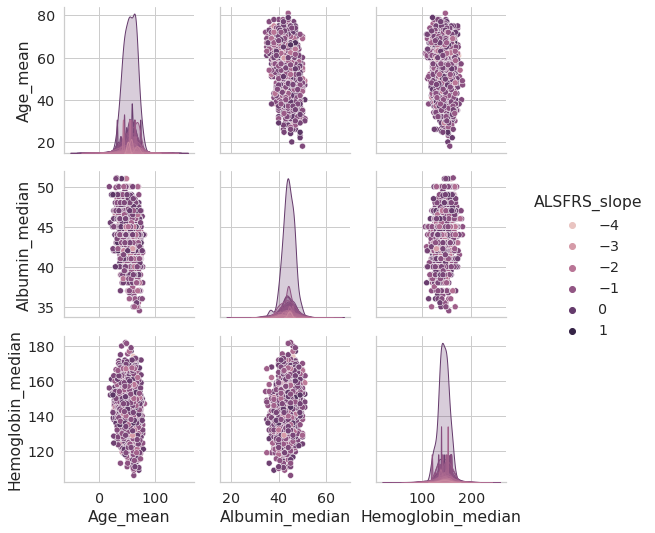

In [17]:
sns.pairplot(Record1, hue = 'ALSFRS_slope')

                   Age_mean  Albumin_median  Hemoglobin_median  ALSFRS_slope
Age_mean           1.000000       -0.352520          -0.205231     -0.019990
Albumin_median    -0.352520        1.000000           0.230923      0.066573
Hemoglobin_median -0.205231        0.230923           1.000000     -0.013947
ALSFRS_slope      -0.019990        0.066573          -0.013947      1.000000


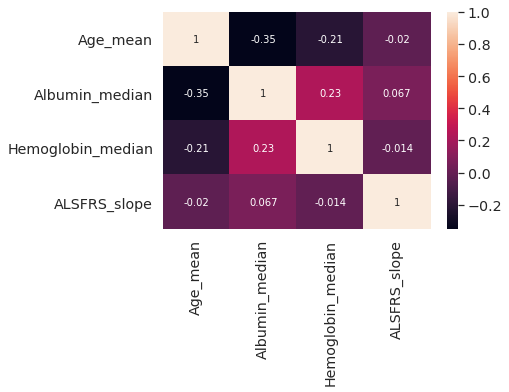

In [18]:
# See if there are any correlations
#Do correlations with select variables
print(Record1.corr(method='pearson'))
sns.heatmap(Record1.corr(method = 'pearson'), annot = True)

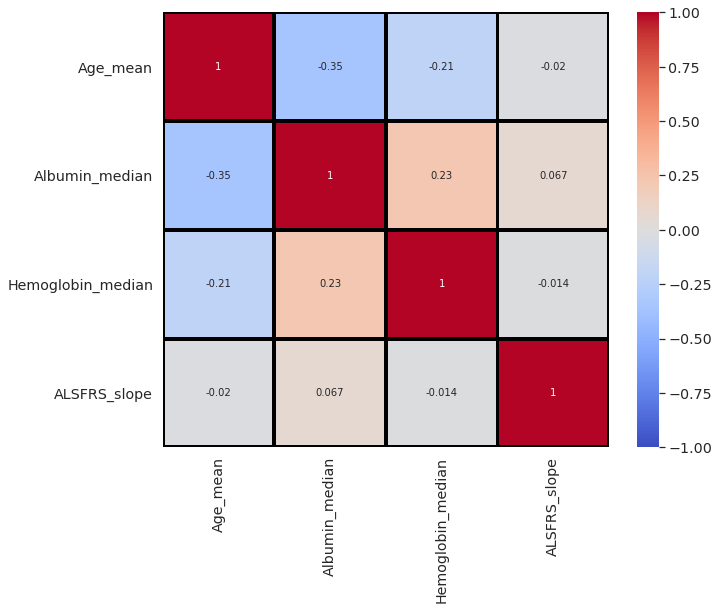

In [19]:
#Plot of heatmaps of the correlations between different features
#Note strong negative correlation between X1 = Crime rate and X7 = % of people 25 years+ with at least 4 years of college
plt.subplots(figsize=(10,8))
corr = Record1.corr()
sns.heatmap(corr,  annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linewidths=3, linecolor='black')
plt.show()

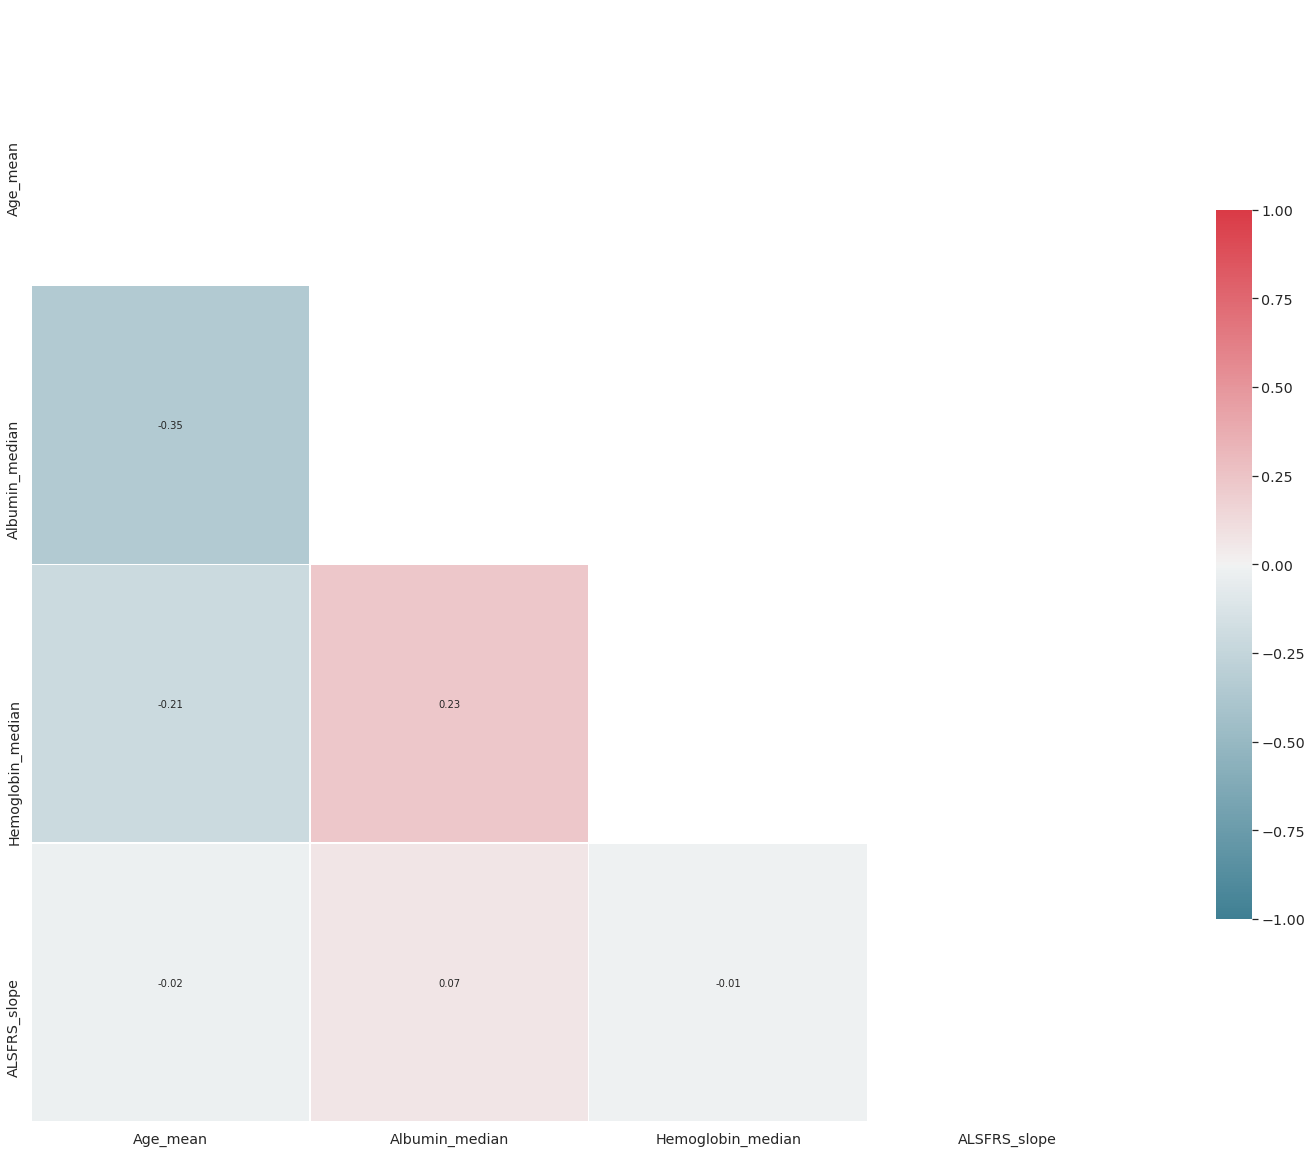

In [20]:
# Draw the heatmap again, with the new correlation matrix
corr=Record1.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

# PCA


In [21]:
ALSdata

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65.000000,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,48.000000,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,38.000000,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,63.000000,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,63.000000,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,104.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,45.000000,42.0,39.5,37.0,0.010823,-0.683521,33,28.0,23,0.021645,171.0,60.0,37.0,0.290043,111,50.0,31.0,0.173160,25.9,23.2,21.0,0.010606,7.0000,5.

# Standardize the data

In [22]:
#Is scaling necessary?
#Do need to scale as some values are in decimal and other numbers are in whole number format
#ale the features in your data before applying PCA
from sklearn.preprocessing import StandardScaler
std_X = StandardScaler().fit_transform(ALSdata)

In [23]:
std_X

array([[ 0.91496967,  3.09906635, -1.26176856, ..., -0.89594627,
         0.43397315,  1.81398442],
       [-0.58067849, -0.60191954, -1.07578884, ...,  0.18462168,
        -1.15547726, -0.44258592],
       [-1.46047152,  0.94015791,  1.15596784, ..., -0.89594627,
        -1.15547726, -0.44258592],
       ...,
       [ 0.46880613,  0.01491144,  0.0400895 , ...,  0.72490565,
         1.22869836,  1.81398442],
       [ 0.56305246, -1.52716602, -1.81970773, ..., -0.3556623 ,
         0.43397315,  0.68569925],
       [-0.65009777,  0.94015791,  0.78400839, ...,  1.80547361,
         1.22869836,  1.81398442]])

# PCA with SK-Learn

In [24]:
#Using SKLearn perform PCA on the dataset to reduce the dimensionality of such a high
#dimensional dataset. (5 marks)
#How many components are enough to explain almost all of the data variance?
#Show the percentage of variance explained by each of the selected components

from sklearn.decomposition import PCA

#assuming components are 8
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(std_X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
principalDf
#'principal component 5', 'principal component 6'
# 'principal component 4'


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-1.564831,-1.649734,3.824562,-2.048055,-4.010174,0.447730,2.046524,3.129604
1,-1.564778,-4.556931,2.171606,0.192965,-0.101932,1.224472,-2.124308,-1.375524
2,1.391688,-0.922851,-3.154862,-5.409162,-0.660358,1.386944,-1.940094,1.556096
3,-1.980780,1.794367,-2.496204,-1.399636,-0.244667,0.189275,2.552880,-0.899781
4,0.184430,-0.323466,-2.887351,2.823624,0.461742,-0.754318,-1.403298,-1.913720
...,...,...,...,...,...,...,...,...
2296,-0.267801,3.067502,0.110160,0.180818,2.978266,2.688813,2.847666,-1.233911
2297,2.587097,-2.834589,-3.776491,2.765042,0.639004,-2.958506,-0.192821,-2.287957
2298,2.198014,-1.418046,-0.573949,3.393552,-0.947734,-3.026002,-0.146673,0.805669
2299,-2.959656,-2.129443,-1.950250,-0.140525,0.606492,1.639654,0.616047,-3.194437


In [25]:
#8 components does not explain all the variance
pca.explained_variance_ratio_

array([0.11412025, 0.06343331, 0.06065604, 0.04585201, 0.04256868,
       0.03906167, 0.03676408, 0.03030469])

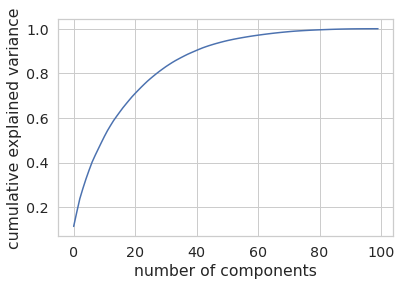

In [26]:
#looks like 80 components explain the variance
pca = PCA().fit(std_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [27]:
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(std_X)
pca.explained_variance_ratio_

array([0.11412025, 0.06343331, 0.06065604, 0.04585207, 0.0425687 ,
       0.0390617 , 0.03676432, 0.03030579, 0.0286206 , 0.02841939,
       0.02775277, 0.0259821 , 0.0230879 , 0.02216568, 0.01934767,
       0.01885815, 0.01857634, 0.01694277, 0.01668287, 0.0162304 ,
       0.0148033 , 0.01431511, 0.01400788, 0.01346172, 0.01302761,
       0.01203336, 0.01149555, 0.01111184, 0.0106483 , 0.01005252,
       0.00990252, 0.00906912, 0.00881027, 0.00823282, 0.0075153 ,
       0.00732002, 0.00709569, 0.00685291, 0.00618436, 0.00599239,
       0.00590326, 0.00578525, 0.00555023, 0.0048705 , 0.00467846,
       0.00425226, 0.00415026, 0.00377709, 0.00374589, 0.00352726,
       0.00331795, 0.00297671, 0.00292313, 0.00266778, 0.00257965,
       0.00241242, 0.00233704, 0.00227316, 0.00217495, 0.00202   ,
       0.00195441, 0.00185004, 0.00181788, 0.00177258, 0.00167852,
       0.00164209, 0.00150853, 0.00144348, 0.00140357, 0.00133248,
       0.00127275, 0.00122266, 0.00110613, 0.00090169, 0.00086

# K-Means Clustering Algorithm



In [33]:
#https://www.integratedots.com/determine-number-of-iris-species-with-k-means/
Sum_of_squared_distances = []
K = range(1,10)
optimalK = 1
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ALSdata)
    Sum_of_squared_distances.append(km.inertia_)
    if k >1:
       ratio = Sum_of_squared_distances[k-1]/Sum_of_squared_distances[k-2]
       if ratio < 0.55:
          optimialK = k

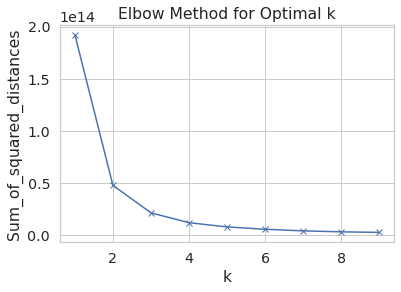

In [34]:
#Plot Elbow graph
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [31]:
#From elbow method chose 2 as number of clusters
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 2)

Records_to_fit = ALSdata
Records_to_fit.sample(5)

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
938,67.0,45.0,44.0,39.0,0.010676,0.000000,33,33.0,33,0.000000,45.0,20.5,13.0,0.056940,29,21.5,18.0,0.019573,34.0,29.5,28.0,0.010676,7.6671,5.84160,4.7463,0.005197,90,78.0,72,0.031634,152,136.0,122,0.052724,2.56985,2.382725,2.24550,0.000577,104.0,101.0,...,135.0,123.0,0.032064,3,3.0,3,0.000000,12,12.0,12,0.000000,-1141,2,306,251.5,232.0,4.4,4.00,3.7,0.001246,82,71.5,61,0.036907,4,4.0,4,0.000000,142.0,140.0,136.0,0.010676,420254,6,6.0,6,0.000000,7.0,6.0,5.0
1450,60.0,48.0,44.0,42.0,0.010399,-0.928753,36,33.0,19,0.030686,65.0,34.0,28.0,0.064125,49,29.5,23.0,0.045061,36.0,31.0,26.0,0.017331,5.8416,5.11140,4.0161,0.003164,84,80.0,76,0.013865,140,126.0,120,0.034662,2.51995,2.357775,2.27045,0.000432,109.0,105.5,...,153.5,146.0,0.022530,5,3.0,1,0.007220,12,11.0,11,0.001805,-258,2,226,210.0,171.0,4.8,4.35,4.2,0.001040,108,90.0,77,0.053726,4,4.0,4,0.000000,145.0,142.5,137.0,0.013865,660466,8,7.0,0,0.014440,6.0,5.0,5.0
557,67.0,45.0,41.5,38.0,0.011532,-0.707364,31,25.0,17,0.025362,37.0,29.0,25.0,0.019769,40,31.5,26.0,0.023064,28.0,25.0,19.0,0.014827,6.2067,4.74630,3.6510,0.004210,84,80.0,70,0.025362,140,130.0,120,0.036232,2.37025,2.245500,2.14570,0.000370,102.0,100.0,...,144.0,136.0,0.029654,2,1.0,0,0.003623,12,12.0,11,0.001812,-638,2,230,191.5,168.0,4.6,4.10,3.9,0.001153,88,80.0,72,0.028986,4,4.0,3,0.001812,140.0,136.5,133.0,0.011532,243510,5,3.0,0,0.009058,6.0,5.0,5.0
146,56.0,49.0,47.0,45.0,0.007380,-1.130731,36,28.5,14,0.040590,47.0,27.0,10.4,0.067528,41,24.0,10.4,0.056458,37.0,28.0,24.8,0.022509,6.8200,5.71000,4.2800,0.004686,100,80.0,70,0.055351,150,120.0,100,0.092251,2.58000,2.380000,2.30000,0.000517,107.0,102.0,...,134.0,129.0,0.016605,8,7.5,4,0.007380,8,3.5,0,0.014760,-474,1,269,209.0,155.0,4.7,4.30,3.9,0.001476,100,80.0,64,0.066421,4,4.0,2,0.003690,143.0,139.0,136.0,0.012915,61024,8,7.0,4,0.007380,9.0,6.0,5.0
482,55.0,50.0,47.0,42.0,0.015873,-0.594463,35,29.0,21,0.028630,49.0,34.5,23.0,0.051587,36,27.0,22.0,0.027778,35.0,29.0,25.0,0.019841,7.3020,6.02415,5.1114,0.004346,82,72.0,60,0.044990,120,110.0,96,0.049080,2.42015,2.382725,2.24550,0.000347,107.0,104.0,...,139.5,132.0,0.023810,7,3.0,2,0.010225,9,7.0,1,0.016360,-253,1,400,282.5,248.0,4.7,4.40,4.2,0.000992,110,88.0,78,0.065440,4,4.0,4,0.000000,145.0,140.5,139.0,0.011905,207374,8,7.0,6,0.004090,9.0,7.0,5.0


In [32]:
kmean.fit(Records_to_fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Once the model has been fitted, we have centroids for our 2 clusters. A centroid is a vector, in the 3 coordinate space.


In [35]:
centroids = kmean.cluster_centers_
print("Shape of Centroids Array: " + str(centroids.shape))

print()
print(centroids)

Shape of Centroids Array: (2, 100)

[[    54.57139411     46.90077594     43.88081953     40.69782912
       0.01363187     -0.71415871     31.66608544     26.90627724
      19.90148213      0.02587377     54.83435048     33.14472537
      23.01290323      0.07450704     42.76111595     29.28247602
      21.63095031      0.05025114     30.65335658     26.82022668
      23.01935484      0.0168747       7.37064799      5.59879078
       4.16549293      0.00731986     91.66608544     80.84742807
      69.54054054      0.04766343    146.57018309    129.2423714
     113.0418483       0.07102676      2.47642096      2.35212957
       2.22452801      0.00054557    107.10749782    103.46059285
      99.33164778      0.01766007     78.55581866     65.08687184
      52.03853915      0.05802019      1.63644289      7.15702092
       5.48967153      4.271953        0.00632154      6.16216216
       4.85789015      3.05841325      0.00679138     42.19593461
      39.66446643     37.16141064      0.

In [36]:
from collections import Counter

labels = kmean.labels_
c = Counter(labels)
print(c.most_common())

for cluster_number in range(0,2):
  print("Cluster {} contains {} samples with percentage of {:.2f}%".format(
      cluster_number, c[cluster_number], c[cluster_number]/sum(c.values()) * 100))

[(1, 1154), (0, 1147)]
Cluster 0 contains 1147 samples with percentage of 49.85%
Cluster 1 contains 1154 samples with percentage of 50.15%


# Visualisation

In [37]:
Record_array = Records_to_fit.values
print(Record_array)

[[65.         57.         40.5        ...  6.          6.
   6.        ]
 [48.         45.         41.         ...  7.          5.
   5.        ]
 [38.         50.         47.         ...  6.          5.
   5.        ]
 ...
 [59.92876712 47.         44.         ...  7.5         6.5
   6.        ]
 [61.         42.         39.         ...  6.5         6.
   5.5       ]
 [47.2109589  50.         46.         ...  8.5         6.5
   6.        ]]


# Validation with Silhouette Score

The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

In [40]:
from sklearn.metrics import silhouette_score as ss

As per SKlearn docs: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [41]:
mean_sihouette_score = ss(Record_array, labels)
print(mean_sihouette_score)

0.629111387587553


Trying different Clusters

In [54]:
kmean = KMeans(n_clusters = 7)
Records2_to_fit = ALSdata
Records2_to_fit.sample(5)
kmean.fit(Records2_to_fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
centroids = kmean.cluster_centers_
print("Shape of Centroids Array: " + str(centroids.shape))

print()
print(centroids)

Shape of Centroids Array: (7, 100)

[[    55.41881961     46.95261682     43.89018692     40.64766355
       0.01374587     -0.73059394     31.78193146     27.09190031
      19.84735202      0.02633944     56.76012461     33.75700935
      23.86697819      0.07318509     45.22741433     29.59501558
      22.16791277      0.05361195     30.77943925     26.96931464
      23.15140187      0.01738955      7.45050333      5.60018536
       4.1737809       0.00755796     91.99376947     81.13084112
      69.69781931      0.04878313    147.44548287    129.95638629
     113.25233645      0.07274339      2.47533364      2.35183844
       2.2180305       0.00055339    107.12866044    103.45358255
      99.5152648       0.01708071     77.54392523     64.13683489
      51.40610592      0.05652499      1.65732087      7.1536838
       5.46705685      4.29125064      0.00646997      6.23364486
       4.89875389      3.05919003      0.00699808     41.71804673
      39.1968053      36.83481931      0.

In [57]:
from collections import Counter

labels = kmean.labels_
c = Counter(labels)
print(c.most_common())

for cluster_number in range(0,7):
  print("Cluster {} contains {} samples with percentage of {:.2f}%".format(
      cluster_number, c[cluster_number], c[cluster_number]/sum(c.values()) * 100))

[(4, 349), (5, 337), (2, 331), (6, 328), (0, 321), (3, 319), (1, 316)]
Cluster 0 contains 321 samples with percentage of 13.95%
Cluster 1 contains 316 samples with percentage of 13.73%
Cluster 2 contains 331 samples with percentage of 14.39%
Cluster 3 contains 319 samples with percentage of 13.86%
Cluster 4 contains 349 samples with percentage of 15.17%
Cluster 5 contains 337 samples with percentage of 14.65%
Cluster 6 contains 328 samples with percentage of 14.25%


In [58]:
Record2_array = Records2_to_fit.values
print(Record2_array)

[[65.         57.         40.5        ...  6.          6.
   6.        ]
 [48.         45.         41.         ...  7.          5.
   5.        ]
 [38.         50.         47.         ...  6.          5.
   5.        ]
 ...
 [59.92876712 47.         44.         ...  7.5         6.5
   6.        ]
 [61.         42.         39.         ...  6.5         6.
   5.5       ]
 [47.2109589  50.         46.         ...  8.5         6.5
   6.        ]]


In [59]:
mean_sihouette_score = ss(Record2_array, labels)
print(mean_sihouette_score)

0.5517132137994109


In [60]:
kmean = KMeans(n_clusters = 10)
Records3_to_fit = ALSdata
Records3_to_fit.sample(5)
kmean.fit(Records3_to_fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
centroids = kmean.cluster_centers_
print("Shape of Centroids Array: " + str(centroids.shape))

print()
print(centroids)

Shape of Centroids Array: (10, 100)

[[    54.60386908     47.19618321     44.14045802     40.80931298
       0.01354746     -0.76421124     31.8778626      26.91221374
      19.34351145      0.02664494     51.57251908     32.22709924
      22.56259542      0.06504881     41.76717557     28.41603053
      20.9351145       0.04538926     31.04580153     26.93587786
      23.08053435      0.01779142      7.44856874      5.50345706
       4.13400813      0.00744608     92.70229008     81.60305344
      70.20992366      0.04729614    147.82061069    129.16221374
     112.72137405      0.07293073      2.47206603      2.3512417
       2.22171873      0.00053672    107.05725191    103.40458015
      99.26908397      0.01837467     78.68085496     64.66916794
      51.19687023      0.06058698      1.66030534      7.38314695
       5.49450382      4.27844221      0.00710325      6.1870229
       4.8740458       2.94274809      0.00688937     41.63782061
      38.98765649     36.4740458       0.

In [62]:
from collections import Counter

labels = kmean.labels_
c = Counter(labels)
print(c.most_common())

for cluster_number in range(0,10):
  print("Cluster {} contains {} samples with percentage of {:.2f}%".format(
      cluster_number, c[cluster_number], c[cluster_number]/sum(c.values()) * 100))

[(0, 262), (5, 243), (9, 238), (4, 233), (7, 233), (6, 229), (3, 228), (1, 226), (2, 219), (8, 190)]
Cluster 0 contains 262 samples with percentage of 11.39%
Cluster 1 contains 226 samples with percentage of 9.82%
Cluster 2 contains 219 samples with percentage of 9.52%
Cluster 3 contains 228 samples with percentage of 9.91%
Cluster 4 contains 233 samples with percentage of 10.13%
Cluster 5 contains 243 samples with percentage of 10.56%
Cluster 6 contains 229 samples with percentage of 9.95%
Cluster 7 contains 233 samples with percentage of 10.13%
Cluster 8 contains 190 samples with percentage of 8.26%
Cluster 9 contains 238 samples with percentage of 10.34%


In [63]:
Record3_array = Records3_to_fit.values
print(Record3_array)

[[65.         57.         40.5        ...  6.          6.
   6.        ]
 [48.         45.         41.         ...  7.          5.
   5.        ]
 [38.         50.         47.         ...  6.          5.
   5.        ]
 ...
 [59.92876712 47.         44.         ...  7.5         6.5
   6.        ]
 [61.         42.         39.         ...  6.5         6.
   5.5       ]
 [47.2109589  50.         46.         ...  8.5         6.5
   6.        ]]


In [64]:
mean_sihouette_score = ss(Record3_array, labels)
print(mean_sihouette_score)

0.5461974833927342


In [71]:
KMean= KMeans(n_clusters=3)
KMean.fit(ALSdata)
label=KMean.predict(ALSdata)

print(ss(ALSdata, label))
#sns.scatterplot(ALSdata[0],ALSdata[1],hue=label,palette=’inferno_r’)

0.5911809065361177


In [ ]:
KMean= KMeans(n_clusters=3)
KMean.fit(ALSdata)
label=KMean.predict(ALSdata)

print(ss(ALSdata, label))

In [93]:
#Create an empty array of mean silhouette scores
silhouette_scores = [] 

#Implement for loop, running kmeans on clusters ranging from 2 to 50 in the ALSdata
for n_cluster in range(2, 50):
    silhouette_scores.append(ss(ALSdata, KMeans(n_clusters = n_cluster).fit_predict(ALSdata)))
    print(silhouette_scores)

[0.629111387587553]
[0.629111387587553, 0.5911809065361177]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432, 0.5606871211369119]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432, 0.5606871211369119, 0.5488774501300951]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432, 0.5606871211369119, 0.5488774501300951, 0.5518842476389113]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432, 0.5606871211369119, 0.5488774501300951, 0.5518842476389113, 0.5509078326384014]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432, 0.5606871211369119, 0.5488774501300951, 0.5518842476389113, 0.5509078326384014, 0.5451475410780238]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432, 0.5606871211369119, 0.5488774501300951, 0.5518842476389113, 0.5509078326384014, 0.5451475410780238, 0.5462572469457072]
[0.629111387587553, 0.5911809065361177, 0.5784181457142432, 0.5606871211369119, 0.5488774501300951, 

KeyboardInterrupt: ignored

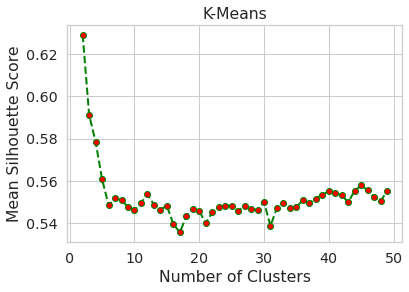

In [99]:
#Line graph

#https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation
import matplotlib.pyplot as plt

#Create an empty array of mean silhouette scores
silhouette_scores = [] 

#Implement for loop, running kmeans on clusters ranging from 2 to 50 in the ALSdata
for n_cluster in range(2, 50):
    silhouette_scores.append(ss(ALSdata, KMeans(n_clusters = n_cluster).fit_predict(ALSdata))) 
    
# Plotting a line graph, plotting mean silhouette score with number of clusters
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49] 

plt.plot(k, silhouette_scores, color='green', linestyle='dashed', linewidth = 2, marker='o', markeredgecolor = 'green', markerfacecolor='red')
plt.title('K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Silhouette Score')
plt.show()

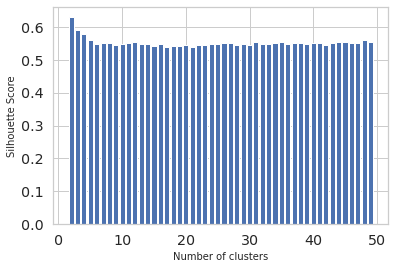

In [74]:
silhouette_scores = [] 

for n_cluster in range(2, 50):
    silhouette_scores.append(ss(ALSdata, KMeans(n_clusters = n_cluster).fit_predict(ALSdata))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Mean Silhouette Score', fontsize = 10) 
plt.show() 